#### Importing necessary libraries and loading the dataset

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import sklearn as sk
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import GridSearchCV

# Data Scaler
from sklearn.preprocessing import StandardScaler

# Regression
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet

In [3]:
# Metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [4]:
df = pd.read_csv('nyc-rolling-sales.csv')

In [5]:
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [6]:
df.shape

(84548, 22)

In [7]:
#To see all columns 
pd.set_option('display.max_columns',500)

In [8]:
df.head(2)

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00


In [9]:
del df['ADDRESS']
del df['APARTMENT NUMBER']
del df['EASE-MENT']
del df['Unnamed: 0']
del df['SALE DATE']
del df['BUILDING CLASS AT PRESENT']
del df['BUILDING CLASS AT TIME OF SALE']
del df['NEIGHBORHOOD']

In [10]:
df.dtypes

BOROUGH                       int64
BUILDING CLASS CATEGORY      object
TAX CLASS AT PRESENT         object
BLOCK                         int64
LOT                           int64
ZIP CODE                      int64
RESIDENTIAL UNITS             int64
COMMERCIAL UNITS              int64
TOTAL UNITS                   int64
LAND SQUARE FEET             object
GROSS SQUARE FEET            object
YEAR BUILT                    int64
TAX CLASS AT TIME OF SALE     int64
SALE PRICE                   object
dtype: object

In [17]:
#SALE PRICE is object but should be numeric
df['SALE PRICE'] = pd.to_numeric(df['SALE PRICE'], errors='coerce')

#LAND and GROSS SQUARE FEET is object but should be numeric
df['LAND SQUARE FEET'] = pd.to_numeric(df['LAND SQUARE FEET'], errors='coerce')
df['GROSS SQUARE FEET']= pd.to_numeric(df['GROSS SQUARE FEET'], errors='coerce')

#Both TAX CLASS attributes should be categorical
df['TAX CLASS AT TIME OF SALE'] = df['TAX CLASS AT TIME OF SALE'].astype('category')
df['TAX CLASS AT PRESENT'] = df['TAX CLASS AT PRESENT'].astype('category')
df['BOROUGH'] = df['BOROUGH'].astype('category')

In [18]:
df.dtypes

BOROUGH                      category
BUILDING CLASS CATEGORY        object
TAX CLASS AT PRESENT         category
BLOCK                           int64
LOT                             int64
ZIP CODE                        int64
RESIDENTIAL UNITS               int64
COMMERCIAL UNITS                int64
TOTAL UNITS                     int64
LAND SQUARE FEET              float64
GROSS SQUARE FEET             float64
YEAR BUILT                      int64
TAX CLASS AT TIME OF SALE    category
SALE PRICE                    float64
dtype: object

In [19]:
sum(df.duplicated(df.columns))

0

In [20]:
df = df.drop_duplicates(df.columns, keep='last')
sum(df.duplicated(df.columns))

0

In [21]:
df.shape

(81677, 14)

In [22]:
df.columns

Index(['BOROUGH', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BLOCK',
       'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'TAX CLASS AT TIME OF SALE', 'SALE PRICE'],
      dtype='object')

In [23]:
df = df[df['SALE PRICE'].notnull()]

In [24]:
df.shape

(68397, 14)

In [19]:
df.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,68397.000000,4.775200e+04,4.720400e+04,68397.000000,6.839700e+04
mean,4197.911619,378.091291,10737.527538,1.869146,0.165694,2.055090,3.560456e+03,3.520477e+03,1798.526675,1.298970e+06
std,3437.695448,659.501766,1271.877807,13.794917,9.076198,16.622344,3.999602e+04,2.917642e+04,522.278341,1.153001e+07
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1348.000000,22.000000,10306.000000,0.000000,0.000000,1.000000,1.466000e+03,8.640000e+02,1920.000000,2.400000e+05
50%,3375.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,2.162000e+03,1.620000e+03,1937.000000,5.400000e+05
75%,6169.000000,1001.000000,11249.000000,2.000000,0.000000,2.000000,3.108000e+03,2.508000e+03,1965.000000,9.600000e+05
max,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,4.252327e+06,3.750565e+06,2017.000000,2.210000e+09


##### Checking for null values

In [25]:
df.isnull().sum()

BOROUGH                          0
BUILDING CLASS CATEGORY          0
TAX CLASS AT PRESENT             0
BLOCK                            0
LOT                              0
ZIP CODE                         0
RESIDENTIAL UNITS                0
COMMERCIAL UNITS                 0
TOTAL UNITS                      0
LAND SQUARE FEET             20645
GROSS SQUARE FEET            21193
YEAR BUILT                       0
TAX CLASS AT TIME OF SALE        0
SALE PRICE                       0
dtype: int64

In [33]:
df['LAND SQUARE FEET']=df['LAND SQUARE FEET'].fillna(df['LAND SQUARE FEET'].mean())
df['GROSS SQUARE FEET']=df['GROSS SQUARE FEET'].fillna(df['GROSS SQUARE FEET'].mean())

In [34]:
df.isnull().sum()

BOROUGH                      0
BUILDING CLASS CATEGORY      0
TAX CLASS AT PRESENT         0
BLOCK                        0
LOT                          0
ZIP CODE                     0
RESIDENTIAL UNITS            0
COMMERCIAL UNITS             0
TOTAL UNITS                  0
LAND SQUARE FEET             0
GROSS SQUARE FEET            0
YEAR BUILT                   0
TAX CLASS AT TIME OF SALE    0
SALE PRICE                   0
dtype: int64

In [35]:
df.shape

(53930, 14)

In [36]:
df = df[(df['SALE PRICE'] > 100000) & (df['SALE PRICE'] < 5000000)]

In [37]:
df.shape

(53930, 14)

### EDA

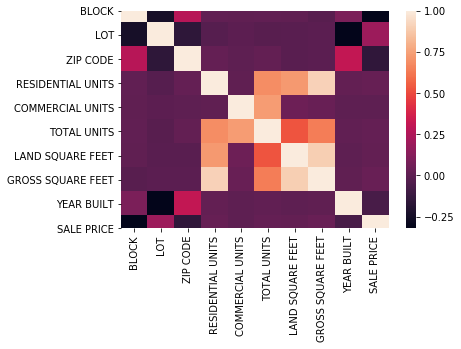

In [38]:
corr = df.corr()
sns.heatmap(corr)

In [32]:
corr['SALE PRICE'].sort_values(ascending=False)

SALE PRICE           1.000000
LOT                  0.193599
GROSS SQUARE FEET    0.032626
RESIDENTIAL UNITS    0.026966
TOTAL UNITS          0.021023
LAND SQUARE FEET     0.019758
COMMERCIAL UNITS     0.003286
YEAR BUILT          -0.069772
ZIP CODE            -0.150115
BLOCK               -0.320064
Name: SALE PRICE, dtype: float64

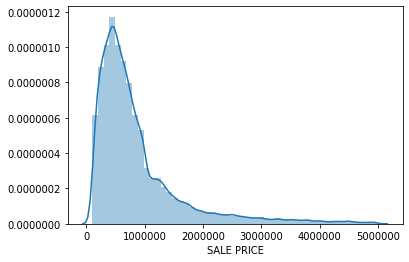

In [29]:
sns.distplot(df['SALE PRICE'])

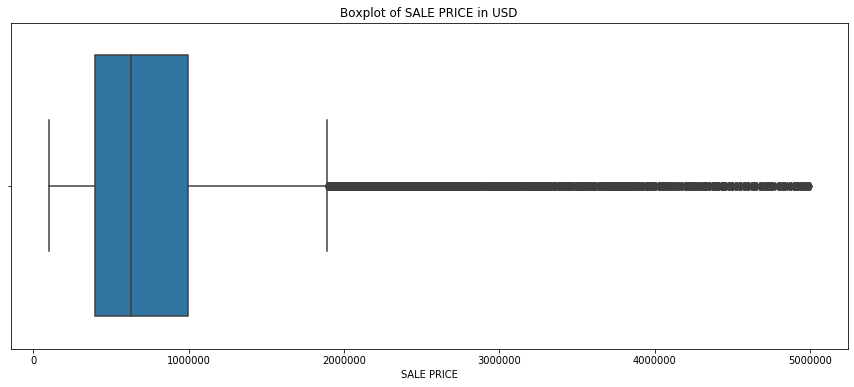

In [30]:
plt.figure(figsize=(15,6))

# Plot the data and configure the settings
sns.boxplot(x='SALE PRICE', data=df)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Boxplot of SALE PRICE in USD')
plt.show()

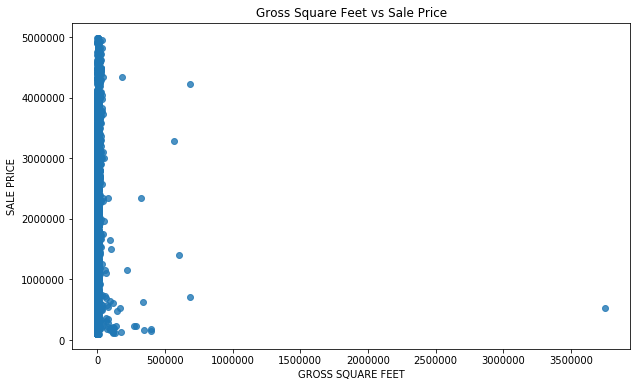

In [31]:
plt.figure(figsize=(10,6))
sns.regplot(x='GROSS SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.8})
plt.title('Gross Square Feet vs Sale Price')
plt.show()

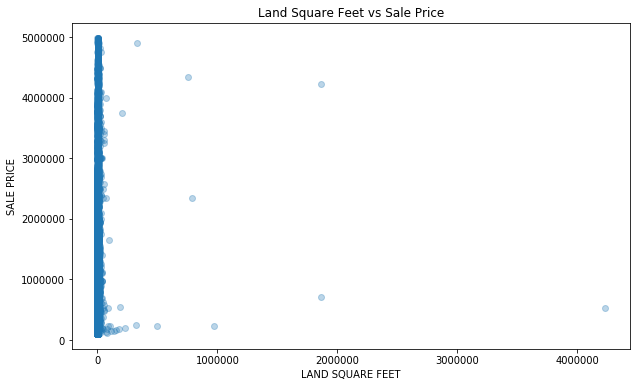

In [32]:
plt.figure(figsize=(10,6))
sns.regplot(x='LAND SQUARE FEET', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.3})
plt.title('Land Square Feet vs Sale Price')
plt.show()

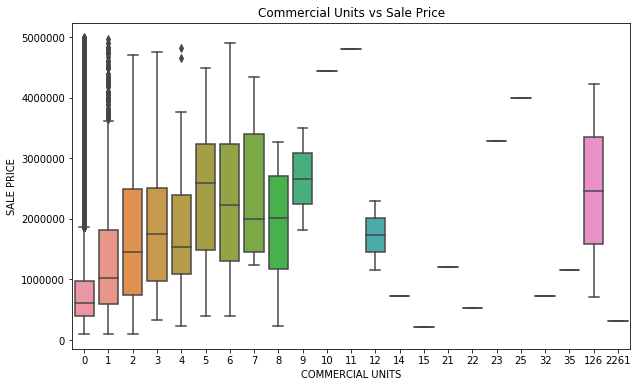

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(x='COMMERCIAL UNITS', y='SALE PRICE', data=df)
plt.title('Commercial Units vs Sale Price')
plt.show()

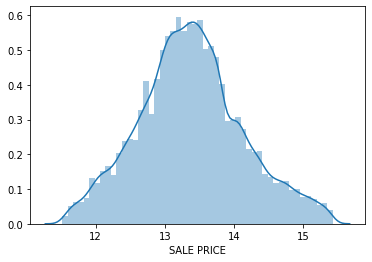

In [35]:
sales=np.log(df['SALE PRICE'])
sns.distplot(sales)

In [39]:
df = df[df['YEAR BUILT'] > 0]

In [40]:
df['BUILDING AGE'] = 2020 - df['YEAR BUILT']

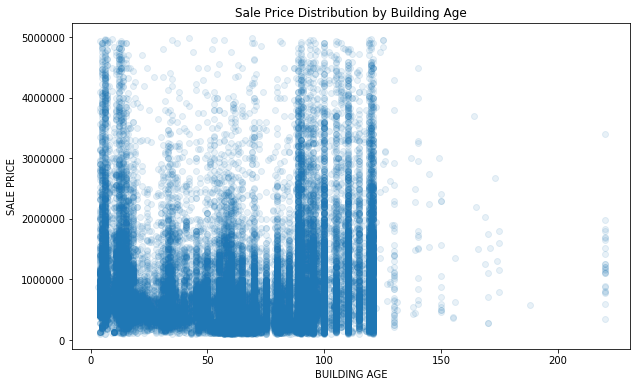

In [39]:
plt.figure(figsize=(10,6))
sns.regplot(x='BUILDING AGE', y='SALE PRICE', data=df, fit_reg=False, scatter_kws={'alpha':0.1})
plt.title('Sale Price Distribution by Building Age')
plt.show()

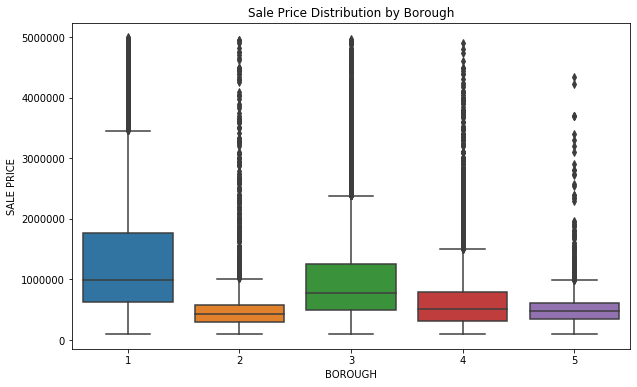

In [30]:
plt.figure(figsize=(10,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.title('Sale Price Distribution by Borough')
plt.show()

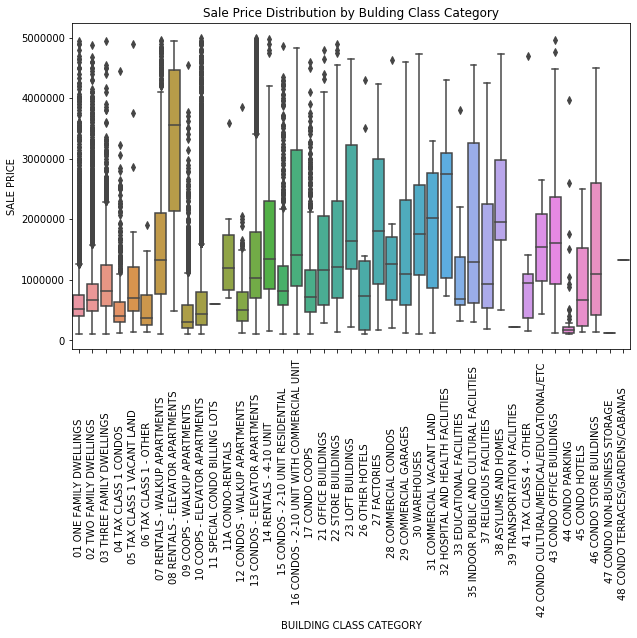

In [43]:
plt.figure(figsize=(10,6))
order = sorted(df['BUILDING CLASS CATEGORY'].unique())
sns.boxplot(x='BUILDING CLASS CATEGORY', y='SALE PRICE', data=df, order=order)
plt.xticks(rotation=90)
plt.title('Sale Price Distribution by Bulding Class Category')
plt.show()

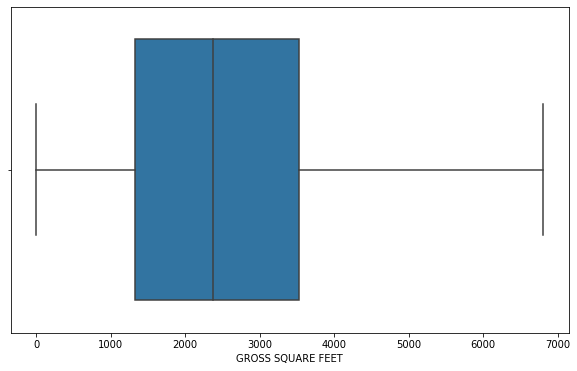

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(x='GROSS SQUARE FEET', data=df,showfliers=False)

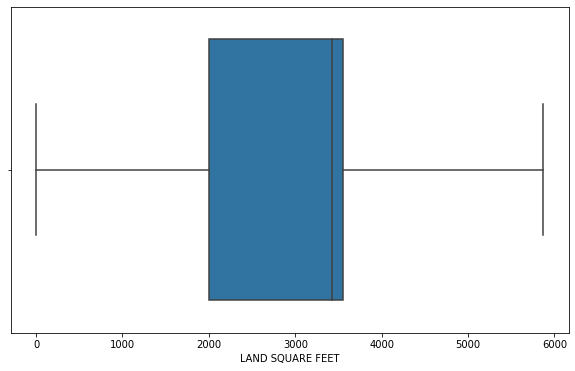

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(x='LAND SQUARE FEET', data=df,showfliers=False)

In [41]:
df = df[(df['TOTAL UNITS'] > 0) & (df['TOTAL UNITS'] != 2261)] 

In [42]:
numeric_data=df.select_dtypes(include=[np.number])
numeric_data.describe()

,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BUILDING AGE
count,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,36544.000000,3.654400e+04,3.654400e+04,36544.000000,3.654400e+04,36544.000000
mean,4829.180413,394.856420,10916.223894,1.784260,0.087210,1.878475,3.284972e+03,2.604259e+03,1953.035820,9.250592e+05,66.964180
std,3756.566044,632.403791,621.350619,11.061229,1.076209,11.218226,2.745400e+04,2.154592e+04,37.505113,7.770560e+05,37.505113
min,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,1800.000000,1.007000e+05,3.000000
25%,1636.000000,26.000000,10314.000000,1.000000,0.000000,1.000000,2.000000e+03,1.300000e+03,1925.000000,4.600000e+05,32.000000
50%,4209.000000,56.000000,11215.000000,1.000000,0.000000,1.000000,2.600000e+03,1.980000e+03,1945.000000,6.800000e+05,75.000000
75%,6949.000000,1006.000000,11362.000000,2.000000,0.000000,2.000000,3.560456e+03,3.511250e+03,1988.000000,1.050000e+06,95.000000
max,16319.000000,8160.000000,11694.000000,1844.000000,126.000000,1866.000000,4.228300e+06,3.750565e+06,2017.000000,4.996841e+06,220.000000


In [43]:
cat_data=df.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
count,36544,36544,36544,36544
unique,5,38,9,3
top,4,01 ONE FAMILY DWELLINGS,1,1
freq,12353,12408,24229,25167


In [44]:
pivot=df.pivot_table(index='TAX CLASS AT PRESENT', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT PRESENT,
1,599000.0
1A,370000.0
1B,650000.0
1C,970639.5
2,999000.0
2A,1200000.0
2B,1847500.0
2C,810000.0
4,1300000.0


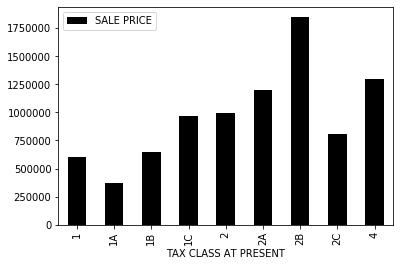

In [49]:
pivot.plot(kind='bar', color='black')

In [51]:
pivot=df.pivot_table(index='TAX CLASS AT TIME OF SALE', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
TAX CLASS AT TIME OF SALE,
1,589950.0
2,1008135.5
4,1300000.0


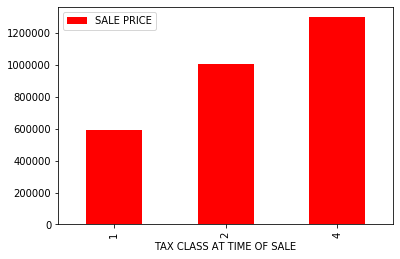

In [52]:
pivot.plot(kind='bar', color='red')

In [35]:
pivot=df.pivot_table(index='BOROUGH', values='SALE PRICE', aggfunc=np.median)
pivot

,SALE PRICE
BOROUGH,
1,1465000.0
2,480000.0
3,870603.0
4,645000.0
5,475000.0


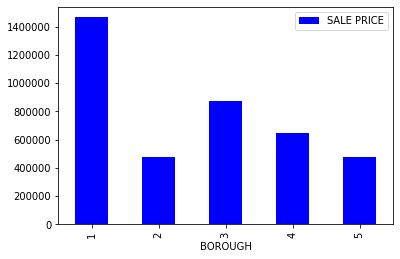

In [54]:
pivot.plot(kind='bar', color='blue')

In [45]:
print(df['BUILDING CLASS CATEGORY'].nunique())

pivot=df.pivot_table(index='BUILDING CLASS CATEGORY', values='SALE PRICE', aggfunc=np.median)
pivot

38


,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,515000.0
02 TWO FAMILY DWELLINGS,665000.0
03 THREE FAMILY DWELLINGS,817833.0
04 TAX CLASS 1 CONDOS,399000.0
05 TAX CLASS 1 VACANT LAND,720000.0
06 TAX CLASS 1 - OTHER,500000.0
07 RENTALS - WALKUP APARTMENTS,1330000.0
08 RENTALS - ELEVATOR APARTMENTS,3560778.5
09 COOPS - WALKUP APARTMENTS,227500.0


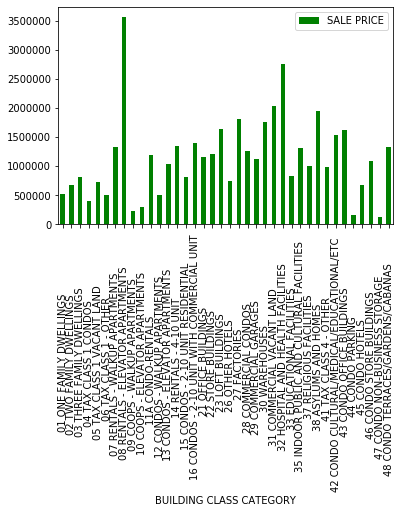

In [57]:
pivot.plot(kind='bar', color='Green')

In [46]:
df.shape

(36544, 15)

In [47]:
numeric_data.columns

Index(['BLOCK', 'LOT', 'ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'YEAR BUILT',
       'SALE PRICE', 'BUILDING AGE'],
      dtype='object')

In [48]:
#transform the numeric features using log(x + 1)
from scipy.stats import skew
skewed = df[numeric_data.columns].apply(lambda x: skew(x.dropna().astype(float)))
skewed = skewed[skewed > 0.75]

In [49]:
skewed = skewed.index
df[skewed] = np.log1p(df[skewed])

In [50]:
df.head(2)

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE,BUILDING AGE
3,1,07 RENTALS - WALKUP APARTMENTS,2B,5.998937,3.091042,10009,2.397895,0.0,2.397895,7.728856,8.823942,1913,2,15.185745,107
6,1,07 RENTALS - WALKUP APARTMENTS,2B,6.008813,3.496508,10009,2.197225,0.0,2.197225,7.467942,8.349248,1920,2,14.976422,100


In [51]:
df.drop('ZIP CODE',axis=1,inplace=True)

In [52]:
df.drop('YEAR BUILT',axis=1,inplace=True)

In [53]:
df.head(2)

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,TAX CLASS AT TIME OF SALE,SALE PRICE,BUILDING AGE
3,1,07 RENTALS - WALKUP APARTMENTS,2B,5.998937,3.091042,2.397895,0.0,2.397895,7.728856,8.823942,2,15.185745,107
6,1,07 RENTALS - WALKUP APARTMENTS,2B,6.008813,3.496508,2.197225,0.0,2.197225,7.467942,8.349248,2,14.976422,100


In [54]:
df.dtypes

BOROUGH                      category
BUILDING CLASS CATEGORY        object
TAX CLASS AT PRESENT         category
BLOCK                         float64
LOT                           float64
RESIDENTIAL UNITS             float64
COMMERCIAL UNITS              float64
TOTAL UNITS                   float64
LAND SQUARE FEET              float64
GROSS SQUARE FEET             float64
TAX CLASS AT TIME OF SALE    category
SALE PRICE                    float64
BUILDING AGE                    int64
dtype: object

In [55]:
cat_data=df.select_dtypes(exclude=[np.number])
cat_data.describe()

,BOROUGH,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,TAX CLASS AT TIME OF SALE
count,36544,36544,36544,36544
unique,5,38,9,3
top,4,01 ONE FAMILY DWELLINGS,1,1
freq,12353,12408,24229,25167


In [56]:
categorical=cat_data.columns

In [57]:
numerical = [col for col in df.columns if col not in categorical and col != 'SALE PRICE']
numerical

['BLOCK',
 'LOT',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'BUILDING AGE']

In [59]:
df.shape

(36544, 13)

#### Separating Input and output variables 

In [60]:
X = df.drop(['SALE PRICE'], axis=1)

y = df['SALE PRICE']

In [61]:
y=y.to_frame()

In [62]:
y

,SALE PRICE
3,15.185745
6,14.976422
79,13.544581
80,13.557843
81,13.849797
...,...
84540,13.140205
84541,13.381648
84543,13.017005
84544,13.217675


#### Scaling Numerical variables

In [63]:
scaler = StandardScaler()
scaler.fit(X[numerical])
X[numerical]=scaler.transform(X[numerical])

In [64]:
scaler1 = StandardScaler()
scaler1.fit(y)
y=scaler1.transform(y)

In [57]:
y

array([[ 2.48886672],
       [ 2.18220971],
       [ 0.08457302],
       ...,
       [-0.68832148],
       [-0.39434095],
       [-0.65612261]])

In [65]:
X = pd.get_dummies(columns=categorical,data=X,drop_first=True)

In [66]:
X

,BLOCK,LOT,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING AGE,BOROUGH_2,BOROUGH_3,BOROUGH_4,BOROUGH_5,BUILDING CLASS CATEGORY_02 TWO FAMILY DWELLINGS,BUILDING CLASS CATEGORY_03 THREE FAMILY DWELLINGS,BUILDING CLASS CATEGORY_04 TAX CLASS 1 CONDOS,BUILDING CLASS CATEGORY_05 TAX CLASS 1 VACANT LAND,BUILDING CLASS CATEGORY_06 TAX CLASS 1 - OTHER,BUILDING CLASS CATEGORY_07 RENTALS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_08 RENTALS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_09 COOPS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_10 COOPS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_11A CONDO-RENTALS,BUILDING CLASS CATEGORY_12 CONDOS - WALKUP APARTMENTS,BUILDING CLASS CATEGORY_13 CONDOS - ELEVATOR APARTMENTS,BUILDING CLASS CATEGORY_14 RENTALS - 4-10 UNIT,BUILDING CLASS CATEGORY_15 CONDOS - 2-10 UNIT RESIDENTIAL,BUILDING CLASS CATEGORY_16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,BUILDING CLASS CATEGORY_21 OFFICE BUILDINGS,BUILDING CLASS CATEGORY_22 STORE BUILDINGS,BUILDING CLASS CATEGORY_23 LOFT BUILDINGS,BUILDING CLASS CATEGORY_26 OTHER HOTELS,BUILDING CLASS CATEGORY_27 FACTORIES,BUILDING CLASS CATEGORY_28 COMMERCIAL CONDOS,BUILDING CLASS CATEGORY_29 COMMERCIAL GARAGES,BUILDING CLASS CATEGORY_30 WAREHOUSES,BUILDING CLASS CATEGORY_31 COMMERCIAL VACANT LAND,BUILDING CLASS CATEGORY_32 HOSPITAL AND HEALTH FACILITIES,BUILDING CLASS CATEGORY_33 EDUCATIONAL FACILITIES,BUILDING CLASS CATEGORY_35 INDOOR PUBLIC AND CULTURAL FACILITIES,BUILDING CLASS CATEGORY_37 RELIGIOUS FACILITIES,BUILDING CLASS CATEGORY_38 ASYLUMS AND HOMES,BUILDING CLASS CATEGORY_41 TAX CLASS 4 - OTHER,BUILDING CLASS CATEGORY_42 CONDO CULTURAL/MEDICAL/EDUCATIONAL/ETC,BUILDING CLASS CATEGORY_43 CONDO OFFICE BUILDINGS,BUILDING CLASS CATEGORY_44 CONDO PARKING,BUILDING CLASS CATEGORY_45 CONDO HOTELS,BUILDING CLASS CATEGORY_46 CONDO STORE BUILDINGS,BUILDING CLASS CATEGORY_47 CONDO NON-BUSINESS STORAGE,BUILDING CLASS CATEGORY_48 CONDO TERRACES/GARDENS/CABANAS,TAX CLASS AT PRESENT_1,TAX CLASS AT PRESENT_1A,TAX CLASS AT PRESENT_1B,TAX CLASS AT PRESENT_1C,TAX CLASS AT PRESENT_2,TAX CLASS AT PRESENT_2A,TAX CLASS AT PRESENT_2B,TAX CLASS AT PRESENT_2C,TAX CLASS AT PRESENT_3,TAX CLASS AT PRESENT_4,TAX CLASS AT TIME OF SALE_2,TAX CLASS AT TIME OF SALE_3,TAX CLASS AT TIME OF SALE_4
3,-1.610112,-0.796694,3.999849,-0.218253,4.078001,0.197387,0.812930,1.067491,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
6,-1.602191,-0.572261,3.470763,-0.218253,3.525714,0.082974,0.600170,0.880847,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
79,-1.670001,1.318137,-0.494868,-0.218253,-0.613816,0.394309,0.518323,0.880847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
80,-1.670001,1.318688,-0.494868,-0.218253,-0.613816,0.394309,0.518323,0.880847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
81,-1.670001,1.319239,-0.494868,-0.218253,-0.613816,0.394309,0.518323,0.880847,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84540,0.714726,0.007155,0.574176,-0.218253,0.502107,0.364315,0.072024,-1.118908,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
84541,0.714836,0.173704,0.574176,-0.218253,0.502107,0.892361,0.299460,-1.092244,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
84543,0.718335,-0.539692,0.574176,-0.218253,0.502107,0.221411,0.378195,-1.198898,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [67]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 123)

#### Model building

In [62]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)
Y_pred_lin = linreg.predict(X_test)
rmse(y_test,Y_pred_lin)

0.7614558221886646

In [68]:
# RMSE
def rmse(y_test,y_pred):
      return np.sqrt(mean_squared_error(y_test,y_pred))

In [63]:
alpha=0.00099
lasso_regr=Lasso(alpha=alpha,max_iter=50000)
lasso_regr.fit(X_train, y_train)
Y_pred_lasso=lasso_regr.predict(X_test)
rmse(y_test,Y_pred_lasso)

0.7635915972542304

In [64]:
ridge = Ridge(alpha=0.01, normalize=True)
ridge.fit(X_train, y_train)
Y_pred_ridge = ridge.predict(X_test)
rmse(y_test,Y_pred_ridge)

0.7609868580809177

In [69]:
rf_regr = RandomForestRegressor()
rf_regr.fit(X_train, y_train)
Y_pred_rf = rf_regr.predict(X_test)
rmse(y_test,Y_pred_rf)

0.5622458482376226

In [70]:
y_pred_train=rf_regr.predict(X_train)

#### RMSE

In [71]:
rmse(y_train,y_pred_train)

0.23325362029443247

#### Conclusions and saving the best model using pickle

In [72]:
import pickle

In [73]:
filename = 'NYC_property_sales_model.sav'
pickle.dump(rf_regr, open(filename, 'wb'))

In [74]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.6690454230783461


#### Saving the model using joblib

In [75]:
from sklearn.externals import joblib 

In [76]:
joblib.dump(rf_regr, 'NYC_Property_Sales_prediction_Model.pkl') 

['NYC_Property_Sales_prediction_Model.pkl']

In [77]:
rf = joblib.load('NYC_Property_Sales_prediction_Model.pkl') 

In [78]:
rf.predict(X_test) 

array([ 0.10635008,  0.54245358, -0.15616806, ...,  0.11649804,
       -1.64883915,  0.8919696 ])